In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset/housing.data',sep='\s+', header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307.0,21.0,288.99,11.69,20.2
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666.0,20.2,331.29,21.32,19.1
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284.0,15.5,394.74,5.49,32.7


In [49]:
# X = df.iloc[:, :-3].values
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV']
X.shape, y.shape

((506, 1), (506,))

Text(0, 0.5, 'MEDV')

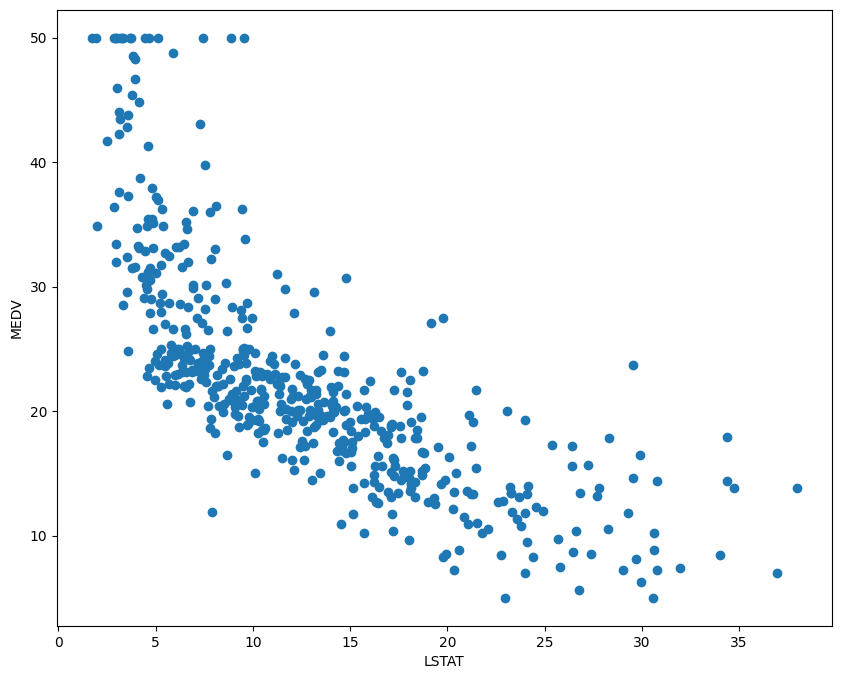

In [50]:
plt.figure(figsize=(10,8));
plt.scatter(X, y);plt.xlabel('LSTAT');plt.ylabel('MEDV')

In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
X[:3]

array([[4.98],
       [9.14],
       [4.03]])

In [52]:
X_poly[:3]

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409]])

In [53]:
plr = LinearRegression()
plr.fit(X_poly, y )

LinearRegression()

In [54]:
X_fit =  np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y_pred = plr.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))
X_fit[:3]

array([[1.73],
       [2.73],
       [3.73]])

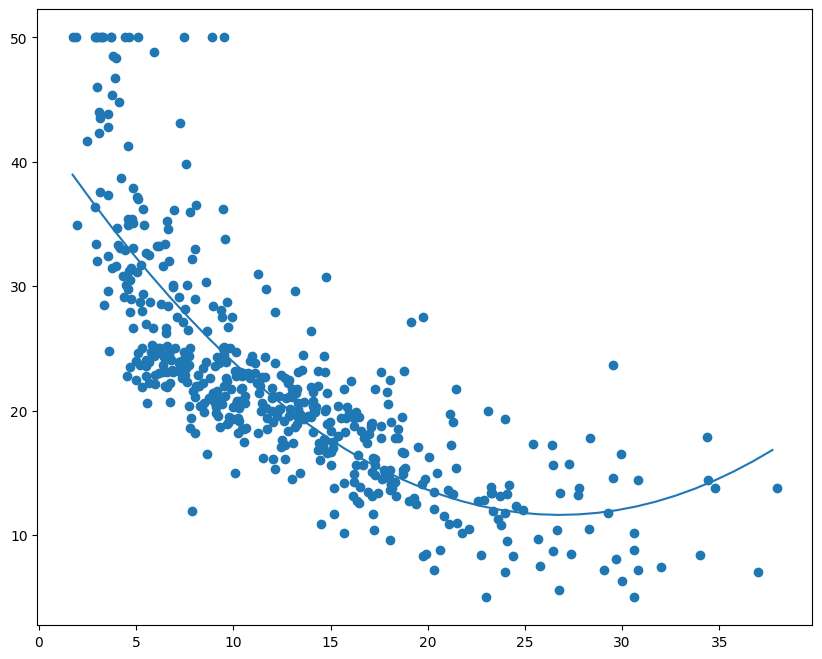

In [56]:
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X_fit, y_pred);


In [61]:
from sklearn.metrics import r2_score
print("R^2 score = {:.2f}".format(r2_score(y,plr.predict(X_poly))))

R^2 score = 0.64
